In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import ops
from geographiclib.geodesic import Geodesic
from shapely.geometry import LineString, MultiLineString

In [2]:
# plotting modules
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

## Parameters

In [3]:
# see https://www.naturalearthdata.com/downloads/
#scale = 50
scale = 10
f'1:{scale}m Physical Vectors'

'1:10m Physical Vectors'

## Download Natural Earth shapefile

In [4]:
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/{scale}m/physical/ne_{scale}m_rivers_lake_centerlines.zip
!mkdir -p ne_{scale}m_rivers_lake_centerlines
!unzip -od ne_{scale}m_rivers_lake_centerlines ne_{scale}m_rivers_lake_centerlines.zip

--2021-07-11 22:39:35--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip [following]
--2021-07-11 22:39:38--  https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip
Resolving naciscdn.org (naciscdn.org)... 146.201.97.163
Connecting to naciscdn.org (naciscdn.org)|146.201.97.163|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  ne_10m_rivers_lake_centerlines.zip
  inflating: ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.README.html  
 extr

## Read dataset

In [5]:
df = gpd.read_file(f'ne_{scale}m_rivers_lake_centerlines/ne_{scale}m_rivers_lake_centerlines.shp')
# drop empty geometries
df = df[~df.geometry.isna()]
df.geometry = df.geometry.apply(lambda geom: MultiLineString([geom]) if geom.geom_type == 'LineString' else geom)
df = df.explode("geometry").reset_index(drop=True)
df

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.45110 17.82050, 95.42766 17.844..."
1,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.45029 17.79133, 95.46640 17.801..."
2,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.46526 17.70690, 95.44947 17.710..."
3,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.60662 16.85786, 95.61891 16.839..."
4,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.47901 16.80569, 95.47950 16.782..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,219River,6.0,River,Po,None,219,Version 4 edit,5.0,Po,6.0,...,Pad,Rio Pó,По,Po,Po Nehri,Sông Po,波河,4,1159129663,"LINESTRING (7.64747 44.83906, 7.64747 44.83906..."
2438,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129677,"LINESTRING (3.07819 46.98509, 3.07171 46.99897..."
2439,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129677,"LINESTRING (4.19060 44.82738, 4.18336 44.80028..."
2440,303Drau,7.0,River,Drau,Drava,303,None,6.0,Drava,7.0,...,Drawa,Rio Drava,Драва,Drava,Drava,None,德拉瓦河,5,1159129685,"LINESTRING (12.29476 46.73269, 12.32897 46.733..."


<AxesSubplot:>

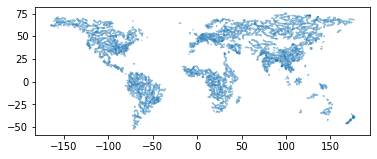

In [6]:
df.plot(alpha=0.5)

In [7]:
# helper function
def segmentize(line):
    return list(map(LineString, zip(line.coords[:-1], line.coords[1:])))

df['geom'] = df.geometry.apply(lambda geom: segmentize(geom))
df = df.explode("geom").reset_index(drop=True)
df = df.rename(columns={'geometry':'_','geom': 'geometry'}).drop(['_'], axis=1)
df

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.45110 17.82050, 95.42766 17.84467)"
1,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.42766 17.84467, 95.38779 17.82441)"
2,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.38779 17.82441, 95.32447 17.76183)"
3,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.32447 17.76183, 95.30527 17.74995)"
4,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"LINESTRING (95.30527 17.74995, 95.27247 17.75532)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253939,303Drau,7.0,River,Drau,Drava,303,None,6.0,Drava,7.0,...,Drawa,Rio Drava,Драва,Drava,Drava,None,德拉瓦河,5,1159129685,"LINESTRING (16.59514 46.31794, 16.60564 46.31586)"
253940,303Drau,7.0,River,Drau,Drava,303,None,6.0,Drava,7.0,...,Drawa,Rio Drava,Драва,Drava,Drava,None,德拉瓦河,5,1159129685,"LINESTRING (16.60564 46.31586, 16.72047 46.31139)"
253941,303Drau,7.0,River,Drau,Drava,303,None,6.0,Drava,7.0,...,Drawa,Rio Drava,Драва,Drava,Drava,None,德拉瓦河,5,1159129685,"LINESTRING (16.72047 46.31139, 16.76637 46.32091)"
253942,303Drau,7.0,River,Drau,Drava,303,None,6.0,Drava,7.0,...,Drawa,Rio Drava,Драва,Drava,Drava,None,德拉瓦河,5,1159129685,"LINESTRING (16.76637 46.32091, 16.85548 46.31578)"


<AxesSubplot:>

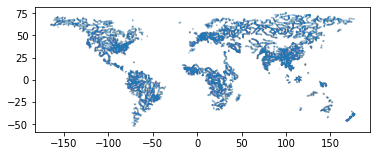

In [8]:
df.plot(alpha=0.5)

In [9]:
# for inverse geodetic calculation
geod = Geodesic.WGS84

def inverse_radian_km(geom):
    # [[lon0, lat0], [lon1, lat1]]
    coords = np.asarray(geom.coords).ravel()
    #g = geod.Inverse(float(xy0.y), float(xy0.x), float(xy1.y), float(xy1.x))
    g = geod.Inverse(coords[1], coords[0], coords[3], coords[2])
    # fix data issue
    if g['azi1'] in (0, 180):
        return (None, None)
    radian = np.pi*(90 + g['azi1'])/180
    radian = radian if radian<=np.pi else radian-2*np.pi
    return (radian, g['s12']/1000.0)

def angle_radian(geom):
    return inverse_radian_km(geom)[0]

def length_km(geom):
    return inverse_radian_km(geom)[1]

df['angle'] = df.geometry.apply(angle_radian)
df['length'] = df.geometry.apply(length_km)
# exclude bad records
df = df[~df.angle.isna()]

In [10]:
# symmetrize directions
_df = df.copy()
_df['angle'] = df.angle.apply(lambda radian: radian-np.pi if radian>=0 else np.pi+radian)
df_sym = pd.concat([df, _df])

## Rose Diagram
https://matplotlib.org/1.2.1/examples/pylab_examples/polar_bar.html

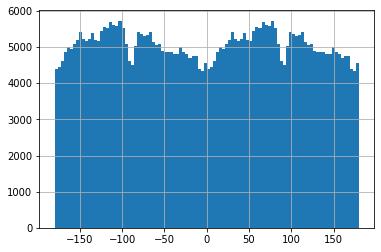

In [11]:
# make the same histogram plot as the rose diagram below
(180*df_sym['angle']/np.pi).hist(bins=100)
plt.show()

In [12]:
# Pandas 0.25.0+
angles = np.linspace(-np.pi, np.pi, 128+1, endpoint=True)
labels = (angles[1:] + angles[:-1])/2
df_sym['sector'] = labels[np.digitize(df_sym.angle, angles)-1]
df_sym_sector = df_sym.groupby(['sector']).agg(num = ('sector','count'),length = ('length','sum')).reset_index()

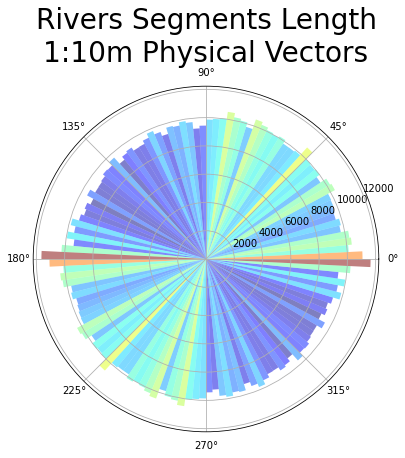

In [13]:
# force square figure and square axes looks better for polar, IMO
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

theta = df_sym_sector.sector.values
radii = df_sym_sector.length.values
width = np.diff(angles)[0]

bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet((r-np.min(radii))/(np.max(radii)-np.min(radii))))
    bar.set_alpha(0.5)

plt.title(f'Rivers Segments Length\n1:{scale}m Physical Vectors', fontsize=28)
plt.savefig(f'Rivers Segments Length 1:{scale}m Physical Vectors.jpg', \
            bbox_inches='tight', dpi=150, pil_kwargs={'quality': 95})
plt.show()

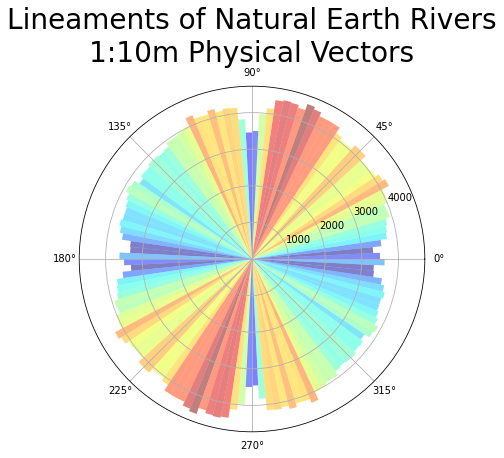

In [14]:
# force square figure and square axes looks better for polar, IMO
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

theta = df_sym_sector.sector.values
radii = df_sym_sector.num.values
width = np.diff(angles)[0]

bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet((r-np.min(radii))/(np.max(radii)-np.min(radii))))
    bar.set_alpha(0.5)

plt.title(f'Lineaments of Natural Earth Rivers\n1:{scale}m Physical Vectors', fontsize=28)
plt.savefig(f'Rivers Segments Count 1:{scale}m Physical Vectors.jpg', \
            bbox_inches='tight', dpi=150, pil_kwargs={'quality': 95})
plt.show()